# Experiment with YouTube Data



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
review_df = pd.read_csv('./data/spam_data.csv', index_col=0)
review_df.head()

,AUTHOR,DATE,CONTENT,CLASS
COMMENT_ID,,,,
LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [3]:
review_df.AUTHOR.nunique()

1792

In [4]:
review_df.shape

(1956, 4)

## EDA

The data is somewhat imbalanced (89.73% recommended). I split them into two DFs - `rec_df` and `filter_df`.

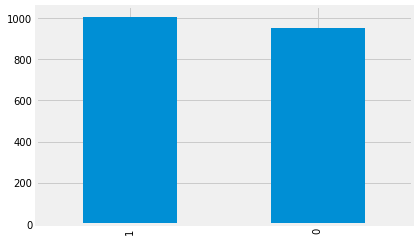

In [5]:
review_df.CLASS.value_counts().plot(kind='bar')

## Text Preprocessing

In this version, I use `doc2vec` to represent the review texts - since it is analoguos to the PCA used to process numeric data. Each review is then projected to a real-value vector.

We should consider using `PCA` and `word2vec`, and maybe pretrained word embedding `GloVe` as baselines.

In [6]:
review_text = review_df['CONTENT']
review_text.shape

(1956,)

In [7]:
from nltk.tokenize import sent_tokenize
sent_lst = []
for text in review_text:
    sent_tokenize_list = sent_tokenize(text)
    sent_lst.append(sent_tokenize_list)

In [8]:
from nltk import RegexpTokenizer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, TweetTokenizer

# initialize required modules
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+') # for removing punctuations
tknzr = TweetTokenizer() # for tokenization
stopwords = stopwords.words('english')

In [9]:
sentences = []
for ss in sent_lst:
    sent = [tknzr.tokenize(s) for s in ss]
    tokens = [tok for s in sent for tok in s]
    sentences.append(tokens)
sentences[:2]

[['Huh',
  ',',
  'anyway',
  'check',
  'out',
  'this',
  'you',
  '[',
  'tube',
  ']',
  'channel',
  ':',
  'kobyoshi',
  '02'],
 ['Hey',
  'guys',
  'check',
  'out',
  'my',
  'new',
  'channel',
  'and',
  'our',
  'first',
  'vid',
  'THIS',
  'IS',
  'US',
  'THE',
  'MONKEYS',
  '!',
  '!',
  '!',
  "I'm",
  'the',
  'monkey',
  'in',
  'the',
  'white',
  'shirt',
  ',',
  'please',
  'leave',
  'a',
  'like',
  'comment',
  'and',
  'please',
  'subscribe',
  '!',
  '!',
  '!',
  '!']]

In [10]:
%%time
normalized = []
for s in sentences:
    #print(s)
    stop_free = ' '.join([w.lower() for w in s if w.lower() not in stopwords])
    #print(stop_free)
    punc_free = tokenizer.tokenize(stop_free)
    lemmas = [lemma.lemmatize(w) for w in punc_free]
    #print(lemmas)
    stems = [stemmer.stem(w) for w in lemmas]
    num_free = [x for x in stems if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    legit_words = [x for x in num_free if not len(x) < 2]
    #print(stems)
    #break
    normalized.append(legit_words)

CPU times: user 1.81 s, sys: 95.2 ms, total: 1.91 s
Wall time: 1.91 s


In [11]:
reviews_text = pd.Series(normalized)
reviews_text.shape

(1956,)

In [12]:
reviews_text[0]

['huh', 'anyway', 'check', 'tube', 'channel', 'kobyoshi']

In [13]:
review_labels = pd.Series(list(review_df['CLASS']))
review_labels.shape

(1956,)

In [14]:
review_labels.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [15]:
reviews = pd.concat([reviews_text, review_labels], axis=1)
reviews.columns = ['text', 'label']
reviews.head()

,text,label
0,"[huh, anyway, check, tube, channel, kobyoshi]",1
1,"[hey, guy, check, new, channel, first, vid, mo...",1
2,"[test, say, murdev, com]",1
3,"[shake, sexi, as, channel, enjoy]",1
4,"[watch, vtarggvgtwq, check]",1


In [16]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [17]:
#reviews = review_df[['CONTENT', 'CLASS']]
#reviews['label'] == -1
## we do folloing recoding since Doc2Vec does not allow negative tags

reviews = reviews.values
reviews[:2]

array([[list(['huh', 'anyway', 'check', 'tube', 'channel', 'kobyoshi']),
        1],
       [list(['hey', 'guy', 'check', 'new', 'channel', 'first', 'vid', 'monkey', 'monkey', 'white', 'shirt', 'pleas', 'leav', 'like', 'comment', 'pleas', 'subscrib']),
        1]], dtype=object)

In [18]:
for idx, rev in enumerate(reviews):
    print(rev[0], rev[1], idx)
    break

['huh', 'anyway', 'check', 'tube', 'channel', 'kobyoshi'] 1 0


This shows the tokens as the first argument which are _tokens_ and _label_ as the second argument (`-1/1`) for `TaggedDocument`.

In [26]:
tagged_docs = [TaggedDocument(words=r[0], tags=[r[1]]) 
               for r in reviews]

In [27]:
type(tagged_docs)

list

In [28]:
tagged_docs[:2]

[TaggedDocument(words=['huh', 'anyway', 'check', 'tube', 'channel', 'kobyoshi'], tags=[1]),
 TaggedDocument(words=['hey', 'guy', 'check', 'new', 'channel', 'first', 'vid', 'monkey', 'monkey', 'white', 'shirt', 'pleas', 'leav', 'like', 'comment', 'pleas', 'subscrib'], tags=[1])]

Save `tagged_docs` to disk so that we can reuse it.

In [29]:
import pickle

with open('./amazon_data_20191202/tagged_docs-20191205.pkl', 'wb') as f:
    pickle.dump(tagged_docs, f)

## Checkpoint 1: Saved Tagged Documents

If want to re-train the _Doc2Vec_ model, start here.

In [30]:
import pickle
with open('./amazon_data_20191202/tagged_docs-20191205.pkl', 'rb') as f:
    tagged_docs = pickle.load(f)

These hyperparameters are suggested by previous analyses.

In [31]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [32]:
#cores = multiprocessing.cpu_count()
max_epochs = 30
#vec_size = 20
alpha = 0.025

model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, 
                     workers=25, alpha=alpha, min_alpha=0.00025)
model_dbow.build_vocab(tagged_docs)

Other studies suggest training between 10 - 20 epochs.

In [33]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model_dbow.train(tagged_docs,
                total_examples=model_dbow.corpus_count,
                epochs=model_dbow.epochs) # use model_dbow.epochs instead
    # decrease the learning rate
    model_dbow.alpha -= 0.0002
    # fix the learning rate, no decay
    #model_dbow.min_alpha = model_dbow.alpha
    
model_dbow.save('./models/model.d2v')

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29


Saving and reading the model `model_dbow` to local so next time do not have to train again.

## Checkpoint 2: Saved Doc2Vec Model

If want to used the trained `Doc2Vec` model, start here.

In [34]:
import gensim
d2v_model = gensim.models.doc2vec.Doc2Vec.load('./models/model.d2v')

In [35]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, feature_vectors

In [36]:
tags, features = vector_for_learning(model_dbow, tagged_docs)

In [37]:
with open('./amazon_data_20191202/features-20191205.pkl', 'wb') as f1:
    pickle.dump(features, f1)
    
    
with open('./amazon_data_20191202/tags-20191205.pkl', 'wb') as f2:
    pickle.dump(tags, f2)

Need to convernt tags and features to a DF so we can use following code.

In [38]:
import pickle

with open('./amazon_data_20191202/features-20191205.pkl', 'rb') as f1:
    features = pickle.load(f1)
    
with open('./amazon_data_20191202/tags-20191205.pkl', 'rb') as f2:
    tags = pickle.load(f2)

In [39]:
type(tags), type(features)

(tuple, tuple)

In [40]:
tags[:2]

(1, 1)

In [41]:
len(features)

1956

In [42]:
len(tags)

1956

In [43]:
import pandas as pd
tags_col = pd.DataFrame(tags)
tags_col.head()

,0
0,1
1,1
2,1
3,1
4,1


In [44]:
features_df = pd.DataFrame(features)
features_df.shape

(1956, 300)

In [45]:
data = pd.concat([features_df, tags_col], axis=1)
data.shape

(1956, 301)

In [46]:
cols = ['w' + str(i) for i in range(300)]
cols[:2]

['w0', 'w1']

In [47]:
len(cols)

300

In [48]:
cols.append('label')
cols[-1]

'label'

In [49]:
data.columns = cols

### Split Data

Note: only used recommended reviews (label == 1) to train AEs.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.1, random_state=2019)
#X_train = X_train[X_train.label == 1]
X_train = X_train.drop(['label'], axis=1)
y_test = X_test['label']
X_test = X_test.drop(['label'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_test.shape

((1760, 300), (196, 300), (196,))

# Basic AutoEncoder

In [75]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras import regularizers

In [76]:
input_dim = X_train.shape[1]
encoding_dim = 128
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [77]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard, es]).history

Train on 1760 samples, validate on 196 samples
Epoch 1/100
1760/1760 [==============================] - 1s 289us/step - loss: 0.1015 - acc: 0.0483 - val_loss: 0.0722 - val_acc: 0.1173
Epoch 2/100
1760/1760 [==============================] - 0s 168us/step - loss: 0.0717 - acc: 0.1227 - val_loss: 0.0649 - val_acc: 0.1582
Epoch 3/100
1760/1760 [==============================] - 0s 167us/step - loss: 0.0654 - acc: 0.1608 - val_loss: 0.0579 - val_acc: 0.2296
Epoch 4/100
1760/1760 [==============================] - 0s 174us/step - loss: 0.0624 - acc: 0.1614 - val_loss: 0.0563 - val_acc: 0.2194
Epoch 5/100
1760/1760 [==============================] - 0s 163us/step - loss: 0.0601 - acc: 0.1807 - val_loss: 0.0538 - val_acc: 0.2296
Epoch 6/100
1760/1760 [==============================] - 0s 166us/step - loss: 0.0589 - acc: 0.1852 - val_loss: 0.0533 - val_acc: 0.2551
Epoch 7/100
1760/1760 [==============================] - 0s 163us/step - loss: 0.0583 - acc: 0.2216 - val_loss: 0.0525 - val_acc: 0

1760/1760 [==============================] - 0s 175us/step - loss: 0.0497 - acc: 0.4898 - val_loss: 0.0452 - val_acc: 0.5204
Epoch 61/100
1760/1760 [==============================] - 0s 179us/step - loss: 0.0499 - acc: 0.4807 - val_loss: 0.0450 - val_acc: 0.5408
Epoch 62/100
1760/1760 [==============================] - 0s 170us/step - loss: 0.0498 - acc: 0.4960 - val_loss: 0.0454 - val_acc: 0.5969
Epoch 63/100
1760/1760 [==============================] - 0s 173us/step - loss: 0.0499 - acc: 0.5125 - val_loss: 0.0452 - val_acc: 0.5663
Epoch 64/100
1760/1760 [==============================] - 0s 173us/step - loss: 0.0496 - acc: 0.5153 - val_loss: 0.0450 - val_acc: 0.5663
Epoch 65/100
1760/1760 [==============================] - 0s 174us/step - loss: 0.0501 - acc: 0.4818 - val_loss: 0.0462 - val_acc: 0.5612
Epoch 66/100
1760/1760 [==============================] - 0s 177us/step - loss: 0.0508 - acc: 0.4841 - val_loss: 0.0452 - val_acc: 0.5612
Epoch 67/100
1760/1760 [=======================

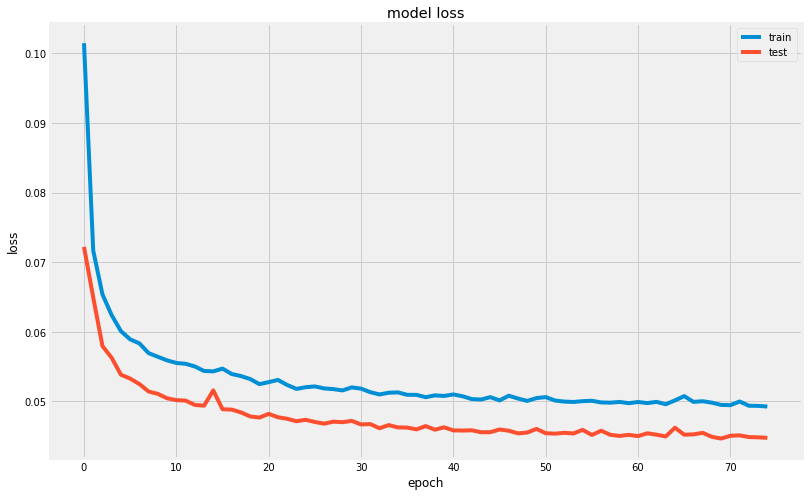

In [78]:
plt.figure(figsize=(12,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [79]:
predictions = autoencoder.predict(X_test)

In [80]:
import numpy as np

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [81]:
error_df.describe()

,reconstruction_error,true_class
count,196.000000,196.000000
mean,0.041956,0.520408
std,0.047795,0.500863
min,0.003568,0.000000
25%,0.012720,0.000000
50%,0.023938,1.000000
75%,0.046876,1.000000
max,0.251860,1.000000


In [82]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

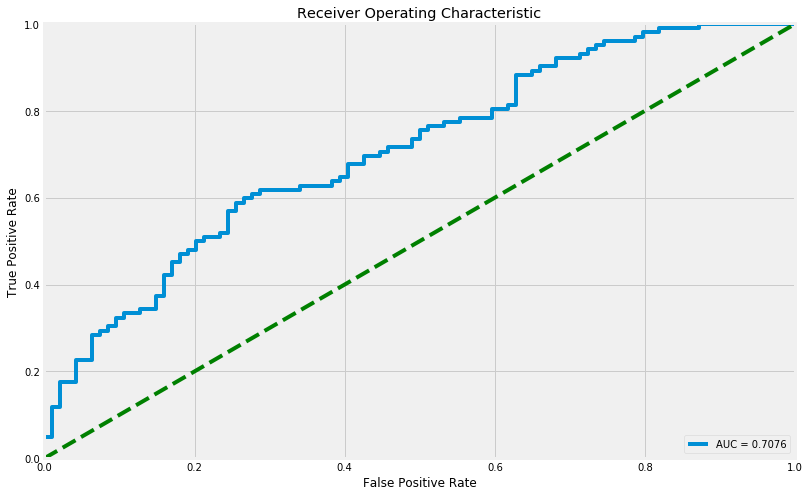

In [83]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

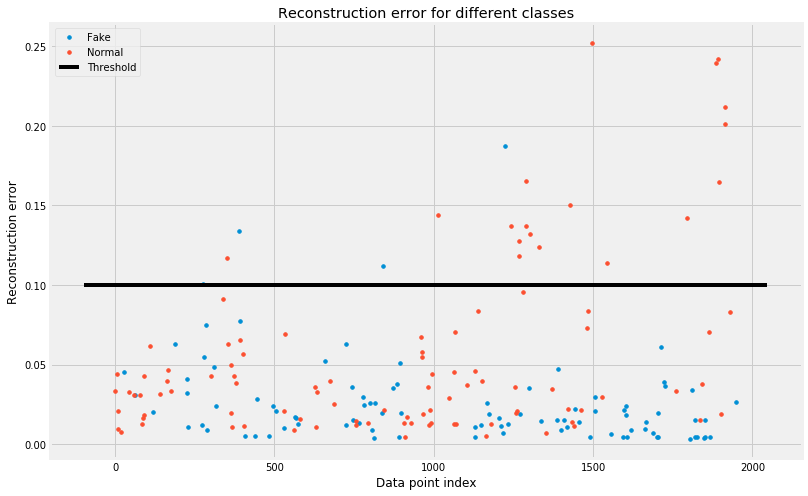

In [84]:
threshold = 0.1

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12,8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Fake")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="black", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

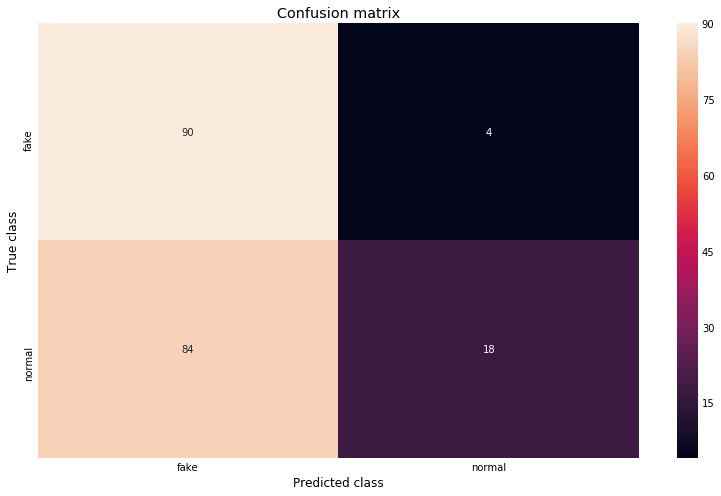

In [85]:
import seaborn as sns
labels = ['fake', 'normal']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [86]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [87]:
from keras.layers import RepeatVector, TimeDistributed
#input_dim = X_train_reshaped.shape[1]
encoding_dim = 128
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
encoder = LSTM(encoding_dim, activation="relu", return_sequences=True,
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoder = LSTM(int(encoding_dim/2), activation="relu", return_sequences=True,
                #activity_regularizer=regularizers.l1(10e-5))(encoder)
encoder = LSTM(int(encoding_dim/4), activation="relu", return_sequences=False)(encoder)
L3 = RepeatVector(X_train_reshaped.shape[1])(encoder)
decoder = LSTM(int(encoding_dim/4), activation='relu', return_sequences=True)(L3)
#decoder = LSTM(int(encoding_dim/2), activation='relu', return_sequences=True)(decoder)
decoder = LSTM(encoding_dim, activation='relu', return_sequences=True)(decoder)
output = TimeDistributed(Dense(X_train_reshaped.shape[2]))(decoder)
lstm_ae = Model(inputs=input_layer, outputs=output)

lstm_ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1, 300)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            219648    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                20608     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 128)            82432     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 300)            38700     
Total para

In [88]:
nb_epoch = 100
batch_size = 32

lstm_ae.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

hist1 = lstm_ae.fit(X_train_reshaped, X_train_reshaped,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_reshaped, X_test_reshaped),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard,es]).history

Train on 1760 samples, validate on 196 samples
Epoch 1/100
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0670 - acc: 0.0716 - val_loss: 0.0443 - val_acc: 0.0867
Epoch 2/100
1760/1760 [==============================] - 1s 585us/step - loss: 0.0416 - acc: 0.0824 - val_loss: 0.0326 - val_acc: 0.1020
Epoch 3/100
1760/1760 [==============================] - 1s 607us/step - loss: 0.0382 - acc: 0.1085 - val_loss: 0.0325 - val_acc: 0.1020
Epoch 4/100
1760/1760 [==============================] - 1s 583us/step - loss: 0.0381 - acc: 0.1085 - val_loss: 0.0326 - val_acc: 0.1020
Epoch 5/100
1760/1760 [==============================] - 1s 619us/step - loss: 0.0381 - acc: 0.1085 - val_loss: 0.0327 - val_acc: 0.1020
Epoch 6/100
1760/1760 [==============================] - 1s 626us/step - loss: 0.0381 - acc: 0.1085 - val_loss: 0.0327 - val_acc: 0.1020
Epoch 7/100
1760/1760 [==============================] - 1s 629us/step - loss: 0.0379 - acc: 0.1085 - val_loss: 0.0323 - val_acc: 0.1

1760/1760 [==============================] - 1s 601us/step - loss: 0.0174 - acc: 0.1767 - val_loss: 0.0176 - val_acc: 0.2143
Epoch 61/100
1760/1760 [==============================] - 1s 604us/step - loss: 0.0174 - acc: 0.1750 - val_loss: 0.0176 - val_acc: 0.2092
Epoch 00061: early stopping


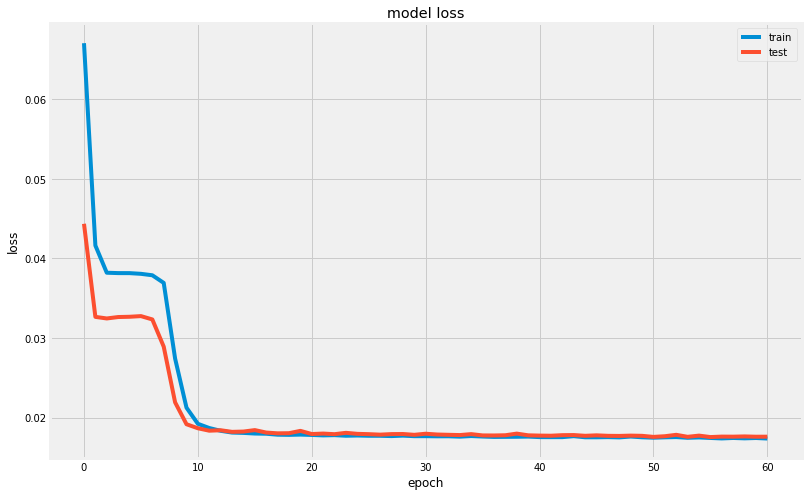

In [89]:
plt.figure(figsize=(12,8))
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [90]:
predictions = lstm_ae.predict(X_test_reshaped)
predictions = predictions.reshape(predictions.shape[0], predictions.shape[2])

In [91]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [92]:
error_df.describe()

,reconstruction_error,true_class
count,196.000000,196.000000
mean,0.017192,0.520408
std,0.014187,0.500863
min,0.001101,0.000000
25%,0.006079,0.000000
50%,0.014766,1.000000
75%,0.024850,1.000000
max,0.080230,1.000000


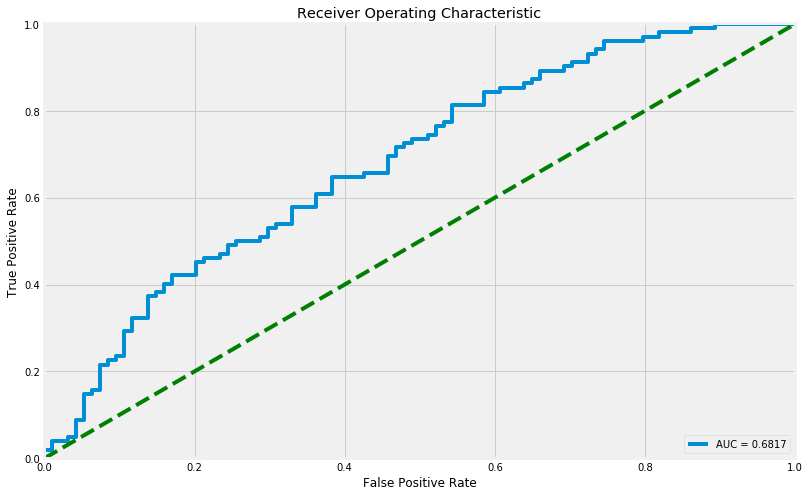

In [93]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

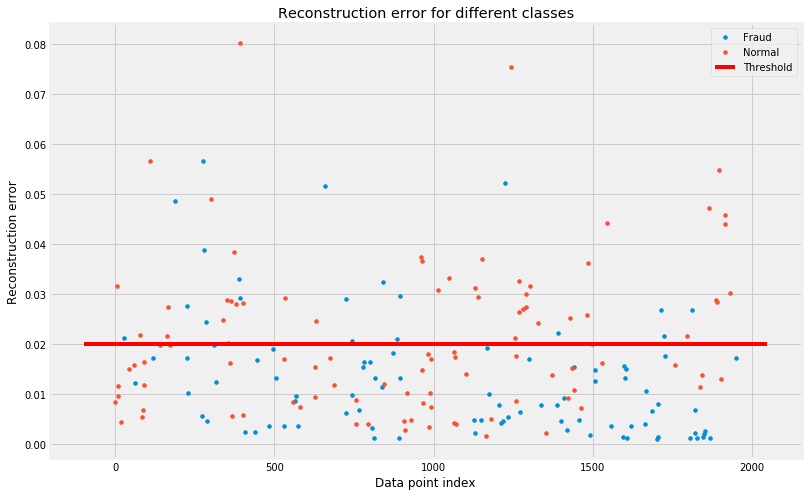

In [97]:
threshold = 0.02

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12,8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

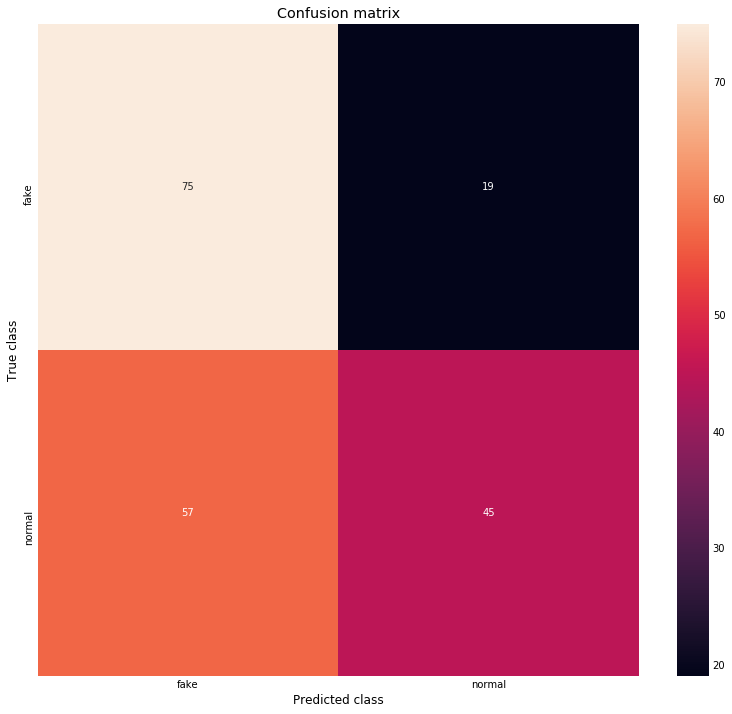

In [98]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()